In [21]:
import numpy as np
import pandas as pd 
import sklearn.linear_model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedShuffleSplit
import math

In [27]:
#LOading Data
happiness2015=pd.read_csv("happiness index/2015.csv",thousands=',')
happiness2016=pd.read_csv("happiness index/2016.csv",thousands=',')
happiness2017=pd.read_csv("happiness index/2017.csv",thousands=',')
happiness2018=pd.read_csv("happiness index/2018.csv",thousands=',')
gdp=pd.read_csv("GDP.csv",thousands=',')


In [3]:
#data Cleaning and manipulation
gdp=gdp.iloc[:,[0,27,28,29,30]].melt(id_vars='Country ',value_vars=['2015','2016','2017','2018'],value_name='gdp',var_name='years').rename(columns={'Country ':'Country'})

happiness2015=happiness2015.loc[:,['Country','Happiness Score']]
happiness2016=happiness2016.loc[:,['Country','Happiness Score']]
happiness2017=happiness2017.loc[:,['Country','Happiness.Score']].rename(columns={'Happiness.Score':'Happiness Score'})
happiness2018=happiness2018.loc[:,['Country or region','Score']].rename(columns={'Country or region':'Country','Score':'Happiness Score'})

happiness=pd.merge(happiness2015,pd.merge(happiness2016,pd.merge(happiness2017,happiness2018, on="Country",suffixes=("2017","2018")),on="Country",suffixes=("3","4")), on="Country",suffixes=("2015","2016"))
happiness=happiness.rename(columns={'Happiness Score2015':'2015','Happiness Score2016':'2016','Happiness Score2017':'2017','Happiness Score2018':"2018"})
happiness=happiness.melt(id_vars='Country',value_vars=['2015','2016','2017','2018'],value_name='hapiness',var_name='years')

full_country_stats = pd.merge(left=happiness, right=gdp,on=["Country","years"])

In [4]:
# generating the test and train data sets
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42) # Set the seed for reproducibility
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train,test=shuffle_and_split_data(full_country_stats, 0.2)

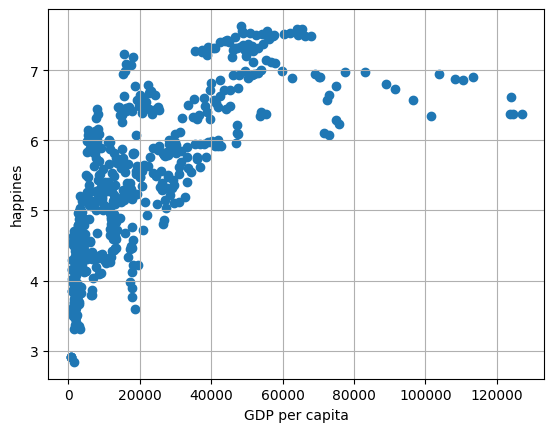

In [6]:
#ploting data to understand trends
x=np.c_[full_country_stats['gdp']]
y=np.c_[full_country_stats['hapiness']]
plt.scatter(x,y)
plt.xlabel("GDP per capita")
plt.ylabel("happines")
plt.grid(True)
plt.show()

In [12]:
train_x=np.c_[train['gdp']]
train_y=np.c_[train['hapiness']]
model=sklearn.linear_model.LinearRegression()
model.fit(train_x,train_y)
model2=KNeighborsRegressor(n_neighbors=3)
model2.fit(train_x,train_y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
tester=np.c_[test['gdp']]
expected=np.c_[test['hapiness']]
results_LR=model.predict(tester)
results_KN=model2.predict(tester)
cnt_KN=0
cnt_LR=0
for i in range(len(test)):
    cnt_LR=cnt_LR + math.sqrt((1/len(test))*(results_LR[i]-expected[i])**2)
    cnt_KN=cnt_KN + math.sqrt((1/len(test))*(results_KN[i]-expected[i])**2)
    

print(f"Avg RMSE from LinearRegsor={cnt_LR/len(test)}")
print(f"Avg RMSE from KNeighbourRegressor={cnt_KN/len(test)}")





Avg RMSE from LinearRegsor=0.06092499884067686
Avg RMSE from KNeighbourRegressor=0.05003570052842218


C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\1118788672.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cnt_LR=cnt_LR + math.sqrt((1/len(test))*(results_LR[i]-expected[i])**2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\1118788672.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cnt_KN=cnt_KN + math.sqrt((1/len(test))*(results_KN[i]-expected[i])**2)


In [40]:
def rmse(actual, predicted):
    return math.sqrt(sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual))

print(rmse(results_KN,expected))
print(rmse(results_LR,expected))

0.6453043287922544
0.7817503950072143


C:\Users\DELL\AppData\Local\Temp\ipykernel_22016\3155701595.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual))
